# Fish Weight Prediction Model

# Introduction


Machine learning model to predict the weight of the fish based on the body measurement data of seven types of fish species. You can download the dataset from Kaggle. [Fish](https://www.kaggle.com/aungpyaeap/fish-market)
 
I am going to use Linear model from sklearn library. Since there are multiple features its **Multiple/Multi Variable Linear Regression** problem.



# Importing Libraries

* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* pandas: Used for data manipulation and analysis
* matplotlib : It’s plotting library, and we are going to use it for data visualization
* seaborn : It is also data visualization library, based on matplotlib
* linear_model: Sklearn linear regression model
* train_test_split : helper function from Sklearn library for splitting the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Extracting Data

In [2]:
data=pd.read_csv('Fish.csv')

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
619,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
620,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
621,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
622,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
623,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


Let's see columns of data

In [5]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

We can see the shape of data

In [6]:
data.shape

(624, 7)

As we see there are 159 observations

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  624 non-null    object 
 1   Weight   624 non-null    float64
 2   Length1  624 non-null    float64
 3   Length2  624 non-null    float64
 4   Length3  624 non-null    float64
 5   Height   624 non-null    float64
 6   Width    624 non-null    float64
dtypes: float64(6), object(1)
memory usage: 34.2+ KB


describe hepls us to see mean,count,std,min,max and percentages

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,624.0,376.900000,324.287452,0.0000,120.000000,271.0000,612.500000,1650.000
Length1,624.0,25.679808,9.174158,7.5000,19.000000,25.0000,32.125000,59.000
Length2,624.0,27.811218,9.847218,8.4000,21.000000,26.7500,35.000000,63.400
Length3,624.0,30.598237,10.751252,8.8000,23.025000,29.2500,39.425000,68.000
Height,624.0,8.947848,4.313020,1.7284,5.931675,7.6478,12.378550,18.957
Width,624.0,4.373817,1.665973,1.0476,3.369600,4.2433,5.424375,8.142


Let's see missing values 

In [9]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Let's see 'Species' column  values

In [10]:
Species=data['Species'].value_counts()
Species

Perch        224
Bream        140
Roach         80
Pike          56
Smelt         56
Parkki        44
Whitefish     24
Name: Species, dtype: int64

# Data visualization

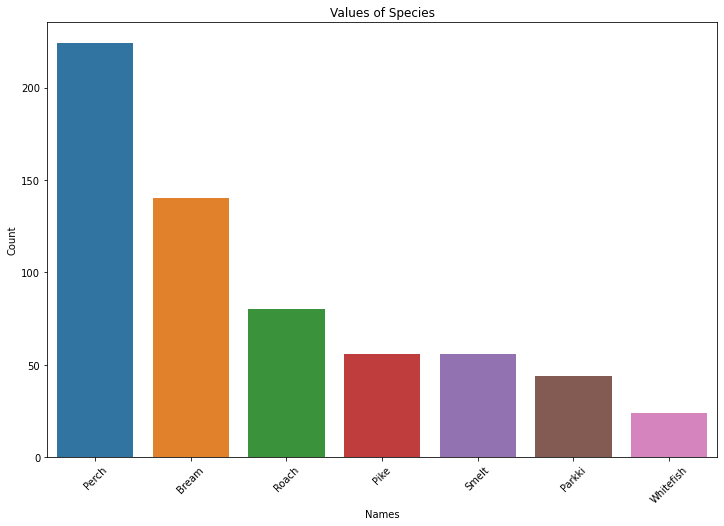

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(x=Species.index, y=Species.values)
plt.title('Values of Species')
plt.xlabel('Names')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Let's create pie chart using matplotlib to see the percentage of species

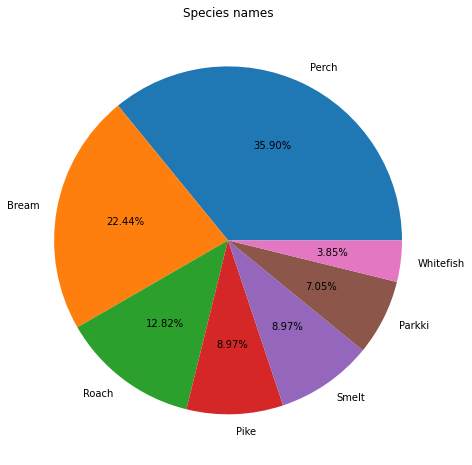

In [12]:
plt.figure(figsize=(12, 8))
plt.pie(Species.values, labels=Species.index, autopct='%1.2f%%')
plt.title('Species names')
plt.show()

We can see how many unique values column have

In [13]:
data['Weight'].unique()

array([ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
        475. ,  600. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,
        680. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
        925. ,  975. ,  950. ,   40. ,   69. ,   78. ,   87. ,  120. ,
          0. ,  110. ,  150. ,  145. ,  160. ,  140. ,  169. ,  161. ,
        200. ,  180. ,  272. ,  270. ,  306. ,  540. ,  800. ,   55. ,
         60. ,   90. ,  170. ,  273. ,  300. ,    5.9,   32. ,   51.5,
         70. ,  100. ,   80. ,   85. ,  115. ,  125. ,  130. ,  135. ,
        225. ,  188. ,  197. ,  218. ,  260. ,  265. ,  250. ,  320. ,
        514. ,  556. ,  840. ,  690. ,  900. ,  820. , 1015. , 1100. ,
        345. ,  456. ,  510. ,  567. ,  770. , 1250. , 1600. , 1550. ,
       1650. ,    6.7,    7.5,    7. ,    9.7,    9.8,    8.7,   10. ,
          9.9,   12.2,   13.4,   19.7,   19.9])

Let's see the relationship between the features

# Correlation Analysis

* Correlation helps us investigate and establish relationships between variables
* Correlation coefficient range from -1 to +1
* Sign(+/-) indicate the direction and amount indicate the strength of correlation
* +1.00 means perfect positive relationship
* 0.00 means no relationship
* -1.00 means perfect negative relationship

In [14]:
data.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.898081,0.901891,0.908788,0.787693,0.912955
Length1,0.898081,1.000000,0.999425,0.990743,0.669376,0.883393
Length2,0.901891,0.999425,1.000000,0.993158,0.685137,0.889997
Length3,0.908788,0.990743,0.993158,1.000000,0.749094,0.891982
Height,0.787693,0.669376,0.685137,0.749094,1.000000,0.800523
Width,0.912955,0.883393,0.889997,0.891982,0.800523,1.000000


Let's visualize 

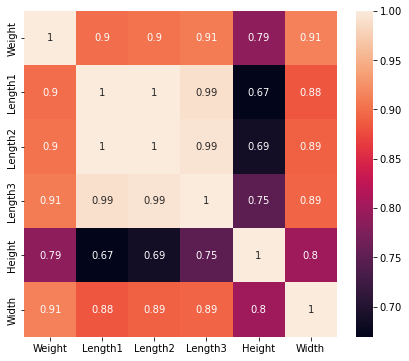

In [15]:
plt.figure(figsize=(7,6))
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()

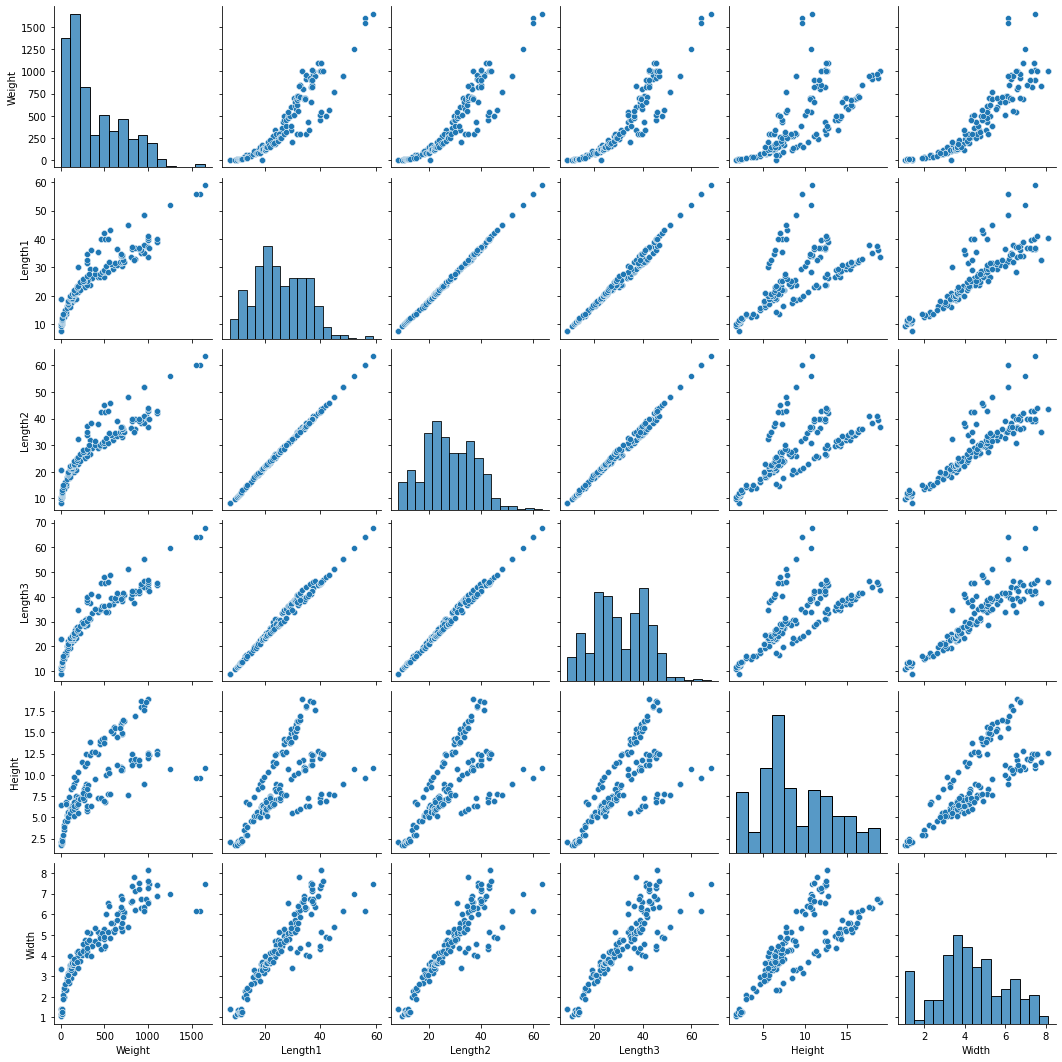

In [16]:
sns.pairplot(data, kind='scatter')
plt.show()

Let's get numeric data , write function & use scatterplot 

In [17]:
numeric_columns=data._get_numeric_data().columns
numeric_columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

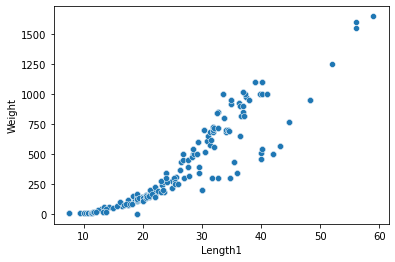

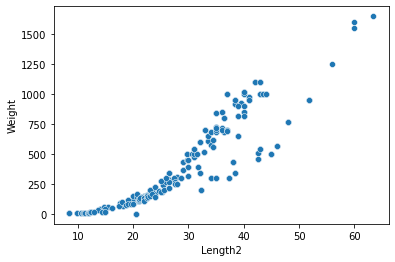

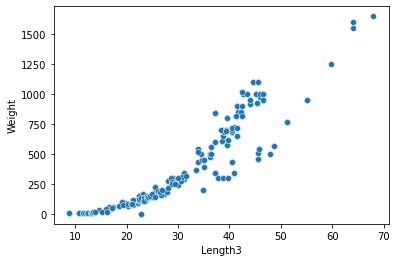

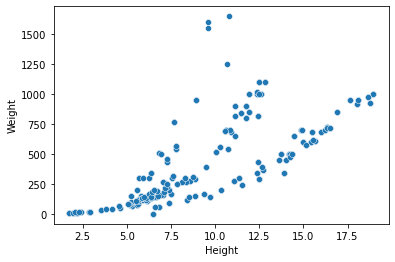

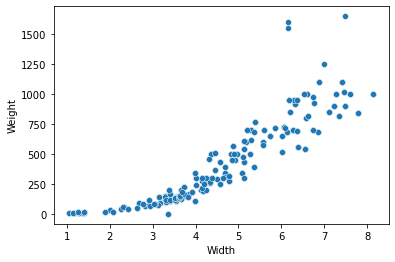

In [18]:
for col in numeric_columns:
    if col!='Weight':
      sns.scatterplot(x=col,y='Weight',data=data)
    plt.show()

In [19]:
print('Max length of fish:',data['Length1'].max())
print('Min length of fish:',data['Length1'].min())
print('Average length of fish:',data['Length1'].mean())

Max length of fish: 59.0
Min length of fish: 7.5
Average length of fish: 25.679807692307676


# Finding Outliers 

* Outlier is an extremely high or extremely low value in our data
* We use below formula to identify the outlier
  ```
    ( Greater than Q3 + 1.5 * IQR ) OR ( Lower than Q1 -1.5 * IQR )
 
    where,
    Q1  = First quartile
    Q3  = Third quartile
    IQR = Interquartile range (Q3 - Q1)
  ```
 
* Lets use box plot for outlier visualization. 
* Vertical line on the left side of box plot represent the 'min' value of dataset and vertical line on right side of box plot represent the 'max' value of dataset.

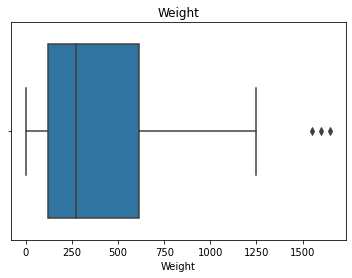

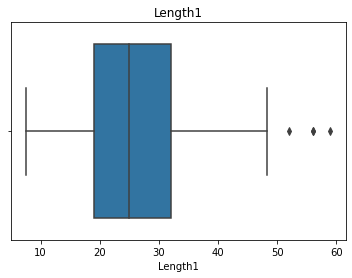

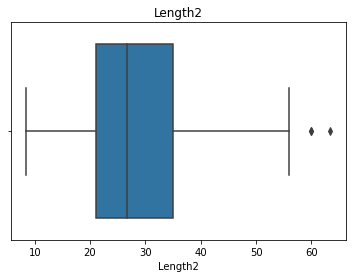

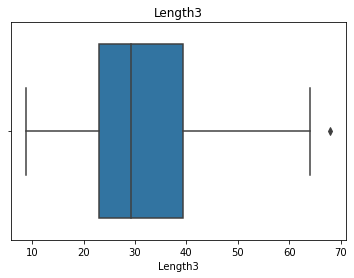

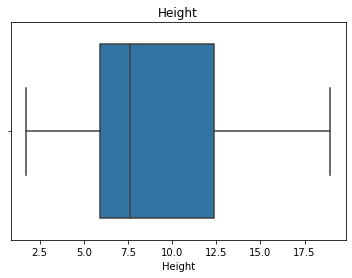

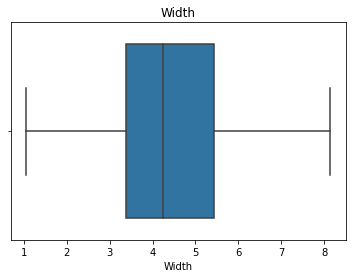

In [20]:
for col in numeric_columns:
    plt.title(col)
    sns.boxplot(data[col])
    plt.show()

In [21]:
def outliers(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return df[ (df[col]<lower_bound) | (df[col]>upper_bound) ]

In [22]:
for col in numeric_columns:
    print('#'*20, col ,'#'*20)
    print(outliers(data, col))

#################### Weight ####################
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length1 ####################
    Species  Weight  Length1  Length2  Length3   Height   Width
141    Pike  1250.0     52.0     56.0     59.7  10.6863  6.9849
142    Pike  1600.0     56.0     60.0     64.0   9.6000  6.1440
143    Pike  1550.0     56.0     60.0     64.0   9.6000  6.1440
144    Pike  1650.0     59.0     63.4     68.0  10.8120  7.4800
#################### Length2 ####################
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length3 ######

In [23]:
data.loc[140:145, :]

,Species,Weight,Length1,Length2,Length3,Height,Width
140,Pike,950.0,48.3,51.7,55.1,8.9262,6.1712
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476


In [24]:
data.drop([141, 142, 143, 144], inplace=True)

In [25]:
data.loc[140:145, :]

,Species,Weight,Length1,Length2,Length3,Height,Width
140,Pike,950.0,48.3,51.7,55.1,8.9262,6.1712
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476


In [26]:
data.shape

(620, 7)

As we see data shape is reduced (we deleted 4 columns)

We can rename columns like this

In [27]:
data.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
data.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Linear regression

In [28]:
y = data['Weight']
X = data.iloc[:,2:7]

In [29]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
619     12.2
620     13.4
621     12.2
622     19.7
623     19.9
Name: Weight, Length: 620, dtype: float64

In [30]:
X

,LengthVer,LengthDia,LengthCro,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
619,11.5,12.2,13.4,2.0904,1.3936
620,11.7,12.4,13.5,2.4300,1.2690
621,12.1,13.0,13.8,2.2770,1.2558
622,13.2,14.3,15.2,2.8728,2.0672


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (496, 5)
X_test dimension=  (124, 5)
y_train dimension=  (496,)
y_train dimension=  (124,)


In [32]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
print('Model intercept: ', lr.intercept_)
print('Model coefficients: ', lr.coef_)

Model intercept:  -414.01670599151686
Model coefficients:  [106.8312198  -52.86634293 -35.70458331  37.09870194  62.91980878]


In [34]:
lr.score(X_test, y_test)

0.906702443657602

In [35]:
values=[0,10,0,0,0]

In [36]:
for i in values:
    if i==0:
        print('please give values grater than zero')
        break
else:
    print("The weight is:", lr.predict([values]))

please give values grater than zero


In [37]:
values=[10,10,10,10,10]

In [38]:
for i in values:
    if i==0:
        print('please give values grater than zero')
        break
else:
    print("The weight is:", lr.predict([values]))

The weight is: [768.77133675]
